#  Intro to the Dataset and the Aim
<img src="loantap_logo.png" alt="LoanTap logo banner" style="width: 800px;"/>

**Problem Statement**: LoanTap, an online platform offering customized loan products, is facing challenges in efficiently assessing the creditworthiness of loan applicants. By predicting the likelihood of default, the company aims to minimize risks and improve the decision-making process for loan approvals.

**Objective**: The goal is to develop a machine learning model that can predict whether an applicant will default on a personal loan, based on their financial and credit history attributes. The model should help LoanTap make data-driven decisions, reducing the overall risk of default.

**Dataset Overview**: LoanTap has provided a dataset containing various financial and credit-related features for loan applicants. Below is a summary of the dataset:

| Column               | Description                                                        |
|----------------------|--------------------------------------------------------------------|
| loan_amnt            | The loan amount applied for by the borrower                        |
| term                 | Loan term in months (36 or 60)                                     |
| int_rate             | Interest rate on the loan                                          |
| installment          | Monthly payment owed if the loan originates                        |
| grade                | LoanTap assigned grade                                             |
| sub_grade            | LoanTap assigned subgrade                                          |
| emp_title            | Job title supplied by the borrower                                 |
| emp_length           | Employment length in years (0-10)                                  |
| home_ownership       | Home ownership status                                              |
| annual_inc           | Self-reported annual income                                        |
| verification_status  | Income verification status (verified/not verified)                 |
| issue_d              | Date the loan was funded                                           |
| loan_status          | Target variable (current loan status: default or not)              |
| purpose              | Purpose of the loan                                                |
| dti                  | Debt-to-income ratio                                               |
| earliest_cr_line     | Month the borrower’s earliest credit line was opened               |
| open_acc             | Number of open credit lines                                        |
| pub_rec              | Number of derogatory public records                                |
| revol_bal            | Total revolving credit balance                                     |
| revol_util           | Revolving line utilization rate                                    |
| total_acc            | Total number of credit lines                                       |
| initial_list_status  | The initial listing status of the loan. Possible values are – W, F |
| pub_rec              | Number of derogatory public records                                |
| application_type     | Individual or joint application                                    |
| mort_acc             | Number of mortgage accounts                                        |
| pub_rec_bankruptcies | Number of public record bankruptcies                               |
| address              | Address of the individual                                          |

**Aim**

1. To analyze which factors are critical in determining whether a borrower will default on a personal loan.
2. To develop a predictive model that estimates the likelihood of loan default based on borrower attributes.
3. Ensure interpretability of the model so LoanTap can understand the key drivers of defaults.

**Methods and Techniques used:** EDA, feature engineering, modeling using sklearn pipelines, hyperparameter tuning

**Measure of Performance and Minimum Threshold to reach the business objective** : Recall > 90% and  precision > 70% 

**Assumptions**
* The dataset is assumed to be representative of LoanTap’s entire customer base.
* The data remains stable over time, and thus, the model is assumed not to decay rapidly.
* External factors (e.g., economic downturns) are not considered, though they could influence loan repayment behavior.

## Library Setup

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd

# Logging
import logging

# Visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Helper libraries
from tqdm.notebook import tqdm, trange # Progress bar
import warnings 
#warnings.filterwarnings('ignore') # ignore all warkings

# To not cache lib import (.py modification won't refelect unless kernal restarts)
#%load_ext autoreload
#%autoreload 2

# Visual setup
%config InlineBackend.figure_format = 'retina' # sets the figure format to 'retina' for high-resolution displays.

# Pandas options
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # display all interaction 
pd.set_option('display.max_columns', None)

# Table styles
table_styles = {
    'cerulean_palette': [
        dict(selector="th", props=[("color", "#FFFFFF"), ("background", "#004D80")]),
        dict(selector="td", props=[("color", "#333333")]),
        dict(selector="table", props=[("font-family", 'Arial'), ("border-collapse", "collapse")]),
        dict(selector='tr:nth-child(even)', props=[('background', '#D3EEFF')]),
        dict(selector='tr:nth-child(odd)', props=[('background', '#FFFFFF')]),
        dict(selector="th", props=[("border", "1px solid #0070BA")]),
        dict(selector="td", props=[("border", "1px solid #0070BA")]),
        dict(selector="tr:hover", props=[("background", "#80D0FF")]),
        dict(selector="tr", props=[("transition", "background 0.5s ease")]),
        dict(selector="th:hover", props=[("font-size", "1.07rem")]),
        dict(selector="th", props=[("transition", "font-size 0.5s ease-in-out")]),
        dict(selector="td:hover", props=[('font-size', '1.07rem'),('font-weight', 'bold')]),
        dict(selector="td", props=[("transition", "font-size 0.5s ease-in-out")])
    ]
}

# Seed value for numpy.random => makes notebooks stable across runs
np.random.seed(42)

## Data Ingestion

In [2]:
from loantap_credit_default_risk_model.data_processing import DataHandler
    
    
data_import = DataHandler(file_path='data/raw/logistic_regression.csv')

df = data_import.load_data()
df = data_import.sanitize(df)

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
display(df.head(10).style.set_table_styles(table_styles['cerulean_palette']).set_caption("DF"))
df.info()
df.describe()

/tmp/ipykernel_642945/2855779721.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.000000,36 months,11.440000,329.480000,B,B4,Marketing,10+ years,RENT,117000.000000,Not Verified,2015-01-01 00:00:00,Fully Paid,vacation,Vacation,26.240000,1990-06-01 00:00:00,16.000000,0.000000,36369.000000,41.800000,25.000000,w,INDIVIDUAL,0.000000,0.000000,"0174 Michelle Gateway Mendozaberg, OK 22690"
1,8000.000000,36 months,11.990000,265.680000,B,B5,Credit analyst,4 years,MORTGAGE,65000.000000,Not Verified,2015-01-01 00:00:00,Fully Paid,debt_consolidation,Debt consolidation,22.050000,2004-07-01 00:00:00,17.000000,0.000000,20131.000000,53.300000,27.000000,f,INDIVIDUAL,3.000000,0.000000,"1076 Carney Fort Apt. 347 Loganmouth, SD 05113"
2,15600.000000,36 months,10.490000,506.970000,B,B3,Statistician,< 1 year,RENT,43057.000000,Source Verified,2015-01-01 00:00:00,Fully Paid,credit_card,Credit card refinancing,12.790000,2007-08-01 00:00:00,13.000000,0.000000,11987.000000,92.200000,26.000000,f,INDIVIDUAL,0.000000,0.000000,"87025 Mark Dale Apt. 269 New Sabrina, WV 05113"
3,7200.000000,36 months,6.490000,220.650000,A,A2,Client Advocate,6 years,RENT,54000.000000,Not Verified,2014-11-01 00:00:00,Fully Paid,credit_card,Credit card refinancing,2.600000,2006-09-01 00:00:00,6.000000,0.000000,5472.000000,21.500000,13.000000,f,INDIVIDUAL,0.000000,0.000000,"823 Reid Ford Delacruzside, MA 00813"
4,24375.000000,60 months,17.270000,609.330000,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.000000,Verified,2013-04-01 00:00:00,Charged Off,credit_card,Credit Card Refinance,33.950000,1999-03-01 00:00:00,13.000000,0.000000,24584.000000,69.800000,43.000000,f,INDIVIDUAL,1.000000,0.000000,"679 Luna Roads Greggshire, VA 11650"
5,20000.000000,36 months,13.330000,677.070000,C,C3,HR Specialist,10+ years,MORTGAGE,86788.000000,Verified,2015-09-01 00:00:00,Fully Paid,debt_consolidation,Debt consolidation,16.310000,2005-01-01 00:00:00,8.000000,0.000000,25757.000000,100.600000,23.000000,f,INDIVIDUAL,4.000000,0.000000,"1726 Cooper Passage Suite 129 North Deniseberg, DE 30723"
6,18000.000000,36 months,5.320000,542.070000,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.000000,Source Verified,2015-09-01 00:00:00,Fully Paid,home_improvement,Home improvement,1.360000,2005-08-01 00:00:00,8.000000,0.000000,4178.000000,4.900000,25.000000,f,INDIVIDUAL,3.000000,0.000000,"1008 Erika Vista Suite 748 East Stephanie, TX 22690"
7,13000.000000,36 months,11.140000,426.470000,B,B2,Office Depot,10+ years,RENT,46000.000000,Not Verified,2012-09-01 00:00:00,Fully Paid,credit_card,No More Credit Cards,26.870000,1994-09-01 00:00:00,11.000000,0.000000,13425.000000,64.500000,15.000000,f,INDIVIDUAL,0.000000,0.000000,USCGC Nunez FPO AE 30723
8,18900.000000,60 months,10.990000,410.840000,B,B3,Application Architect,10+ years,RENT,103000.000000,Verified,2014-10-01 00:00:00,Fully Paid,debt_consolidation,Debt consolidation,12.520000,1994-06-01 00:00:00,13.000000,0.000000,18637.000000,32.900000,40.000000,w,INDIVIDUAL,3.000000,0.000000,USCGC Tran FPO AP 22690
9,26300.000000,36 months,16.290000,928.400000,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.000000,Verified,2012-04-01 00:00:00,Fully Paid,debt_consolidation,Debt Consolidation,23.690000,1997-12-01 00:00:00,13.000000,0.000000,22171.000000,82.400000,37.000000,f,INDIVIDUAL,1.000000,0.000000,"3390 Luis Rue Mauricestad, VA 00813"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  object        
 13 

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,2014-02-02 15:57:58.045602560,17.379514,1998-05-03 09:34:15.062495488,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
min,500.000000,5.320000,16.080000,0.000000e+00,2007-06-01 00:00:00,0.000000,1944-01-01 00:00:00,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,2013-05-01 00:00:00,11.280000,1994-10-01 00:00:00,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,2014-04-01 00:00:00,16.910000,1999-09-01 00:00:00,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,2015-03-01 00:00:00,22.980000,2003-04-01 00:00:00,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,2016-12-01 00:00:00,9999.000000,2013-10-01 00:00:00,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000
std,8357.441341,4.472157,250.727790,6.163762e+04,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174


# EDA

In [3]:
from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile.to_notebook_iframe()

## Validations and Checks
This ensures that when new data is ingested, there are no obvious errors in the data.

In [4]:
!pytest tests/data_tests.py

============================= test session starts ==============================
platform linux -- Python 3.12.6, pytest-8.3.3, pluggy-1.5.0
rootdir: /home/jyothisable/Resources/Coding/Data Science/Scalar Projects/LoanTap-Credit-Default-Risk-Model
configfile: pyproject.toml
plugins: typeguard-4.3.0
collected 4 items                                                              

tests/data_tests.py ....                                                 [100%]

============================== 4 passed in 1.70s ===============================


## Test data 
Separate the test data before visualisation to avoid data snooping bias

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify= y) # default it will shuffle data set before sampling

- Validating if we have created a proper train and test split which is representative of the entire dataset

In [6]:
# Create a profile report for the train dataset
# train_profile = ProfileReport(X_train, title="Train Dataset Profile", explorative=True)
# train_profile.to_notebook_iframe()
# Create a profile report for the test dataset
# test_profile = ProfileReport(X_test, title="Test Dataset Profile", explorative=True)
# test_profile.to_notebook_iframe()

# comparision_report = train_profile.compare(test_profile)
# comparision_report.to_notebook_iframe()

# Feature Engineering
* `int_rate`, `issue_d`, `installment` are found after loan is approved, thus they are removed from the dataset to avoid data leakage
* `emp_title` and `address`  has many categorical values thus to avoid curse of dimensionality, it is removed from the dataset (#TODO use NLP to extract feature from this)
* `earliest_cr_line` is not used because absolute data values are not useful and can affect the model, instead a relative date called `age_of_credit` is created #TODO

In [7]:
categorical_ordinal_features = ['term', 'grade','sub_grade','emp_length', 'verification_status']

term_order = [' 36 months', ' 60 months']
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sub_grade_order = [grade + str(i) for grade in grade_order for i in range(1,6)]
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
verification_status_order = ['Not Verified', 'Verified', 'Source Verified']

order_matrix = [term_order, grade_order, sub_grade_order, emp_length_order, verification_status_order]

categorical_nominal_features = ['home_ownership','purpose','title','initial_list_status','application_type'] # OHE with 1% threshold to be done

numerical_features = ['loan_amnt','revol_util']

numerical_skewed_features = ['annual_inc','dti','open_acc', 'pub_rec','revol_bal', 'total_acc', 'mort_acc','pub_rec_bankruptcies']

## Feature Engineering Pipelines

In [59]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, MinMaxScaler, StandardScaler,OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import OneHotEncoder
from feature_engine.imputation import EndTailImputer
from sklearn.preprocessing import KBinsDiscretizer
    
numerical_skewed_pipeline = Pipeline([
    ('select_numerical_skewed_features', FunctionTransformer(lambda X: X[numerical_skewed_features])),
    ('impuate', SimpleImputer(strategy='median'))
])

numerical_features_pipeline = Pipeline([
    ('select_numerical_features', FunctionTransformer(lambda X: X[numerical_features])),
    ('impuate', SimpleImputer(strategy='mean'))
])

numerical_features_combined_pipeline = Pipeline([
    ('all_numerical',FeatureUnion([
        ('numerical_skewed_pipeline', numerical_skewed_pipeline),
        ('numerical_features_pipeline', numerical_features_pipeline)
        ])),
    ('FE_construction_binning', KBinsDiscretizer(n_bins=8,encode='ordinal',strategy='kmeans')),
    ('numerical_scaling',MinMaxScaler())
])


categorical_ordinal_pipeline = Pipeline([
    ('select_categorical_ordinal_features', FunctionTransformer(lambda X: X[categorical_ordinal_features])),
    ('impuate', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(categories=order_matrix))
])


all_nominal_cat = FeatureUnion([
            ('select_categorical_ordinal_features', FunctionTransformer(lambda X: X[categorical_nominal_features])),
            ('FE_construction_zipcode', FunctionTransformer(lambda X: X['address'].str.strip().str.slice(-5).to_frame('zipcode'))),
            ('FE_construction_state', FunctionTransformer(lambda X: X['address'].str.strip().str.slice(-8,-6).to_frame('state'))),
            ('FE_construction_age_of_credit', FunctionTransformer(lambda X: (X['issue_d'].dt.year - X['earliest_cr_line'].dt.year).to_frame('age_of_credit')))
        ])

categorical_nominal_pipeline = Pipeline([
    ('all_nominal_cat',all_nominal_cat),
    ('impuate', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='infrequent_if_exist',min_frequency=0.01,sparse_output=False))
])

selected_FE = FeatureUnion([
        ('numerical_combined_pipeline',numerical_features_combined_pipeline),
        ('categorical_ordinal_pipeline', categorical_ordinal_pipeline),
        ('categorical_nominal_pipeline', categorical_nominal_pipeline)
    ])

target_pipeline = Pipeline([
    ('target_ohe',FunctionTransformer(lambda x : x.map({'Fully Paid':0,'Charged Off':1})))
])

In [71]:

# from sklearn.impute import KNNImputer

numerical_skewed_pipeline = Pipeline([
    ('select_numerical_skewed_features', FunctionTransformer(lambda X: X[numerical_skewed_features])),
    ('FE_construction_transform', PowerTransformer(method='yeo-johnson',standardize=True)),
    ('FE_improvement_impute', EndTailImputer())
])

numerical_features_pipeline = Pipeline([
    ('select_numerical_features', FunctionTransformer(lambda X: X[numerical_features])),
    ('FE_improvement_impute', EndTailImputer())
])

numerical_features_combined_pipeline = Pipeline([
    ('all_numerical',FeatureUnion([
        ('numerical_skewed_pipeline', numerical_skewed_pipeline),
        ('numerical_features_pipeline', numerical_features_pipeline)
        ])),
    ('FE_extraction_poly',PolynomialFeatures(degree=2)),
    # ('FE_construction_binning', KBinsDiscretizer(encode='ordinal',strategy='kmeans')),
    ('FE_improvement_scaling',MinMaxScaler())
])


categorical_ordinal_pipeline = Pipeline([
    ('select_categorical_ordinal_features', FunctionTransformer(lambda X: X[categorical_ordinal_features])),
    ('FE_improvement_impute', SimpleImputer(strategy='most_frequent')),
    ('FE_construction_ODE', OrdinalEncoder(categories=order_matrix))
])


all_nominal_cat = FeatureUnion([
            ('select_categorical_ordinal_features', FunctionTransformer(lambda X: X[categorical_nominal_features])),
            ('FE_construction_zipcode', FunctionTransformer(lambda X: X['address'].str.strip().str.slice(-5).to_frame('zipcode'))),
            ('FE_construction_state', FunctionTransformer(lambda X: X['address'].str.strip().str.slice(-8,-6).to_frame('state'))),
            ('FE_construction_age_of_credit', FunctionTransformer(lambda X: (X['issue_d'].dt.year - X['earliest_cr_line'].dt.year).to_frame('age_of_credit')))
        ])

categorical_nominal_pipeline = Pipeline([
    ('all_nominal_cat',all_nominal_cat),
    ('FE_improvement_impute', SimpleImputer(strategy='most_frequent')),
    ('FE_construction_OHE', OneHotEncoder(handle_unknown='infrequent_if_exist',min_frequency=0.01,sparse_output=False))
])

experimental_FE = FeatureUnion([
        ('numerical_combined_pipeline',numerical_features_combined_pipeline),
        ('categorical_ordinal_pipeline', categorical_ordinal_pipeline),
        ('categorical_nominal_pipeline', categorical_nominal_pipeline)
    ])

from sklearn.feature_selection import VarianceThreshold
experimental_FE_with_FS = Pipeline([
    ('feature_engineering_pipeline', experimental_FE),
    ('feature_selection_pipeline',VarianceThreshold(threshold=(0.02)))
])


## Feature Evaluation

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,RocCurveDisplay,PrecisionRecallDisplay
import time

def simple_grid_search(x_train, y_train, x_test, y_test, feature_engineering_pipeline,target_pipeline):
    ''' 
    simple helper function to grid search an ExtraTreesClassifier model and 
    print out a classification report for the best param set.
    Best here is defined as having the best cross-validated accuracy on the training set
    '''
    
    params = {  # some simple parameters to grid search
        'base_model__max_depth': [None],
        'base_model__n_estimators': [50],
        'base_model__criterion': ['gini']
    }
    # params = {}

    base_model = ExtraTreesClassifier(n_jobs=6,random_state=42)
    # base_model = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=1, solver='liblinear')
    
    model_with_fe = Pipeline([
        ('feature_engineering_pipeline', feature_engineering_pipeline),
        ('base_model', base_model)
    ])
    

    model_grid_search = GridSearchCV(model_with_fe, param_grid=params, cv=3,n_jobs=6,verbose=True,scoring='recall')
    start_time = time.time()  # capture the start time

    parse_time = time.time()
    print(f"Parsing took {(parse_time - start_time):.2f} seconds")

    model_grid_search.fit(x_train,target_pipeline.fit_transform(y_train))
    fit_time = time.time()
    print(f"Training took {(fit_time - start_time):.2f} seconds")

    best_model = model_grid_search.best_estimator_

    y_pred=best_model.predict(x_test)
    print(classification_report(target_pipeline.transform(y_test), y_pred))
    
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")
    
    return best_model

best_model = simple_grid_search(X_train, y_train, X_test, y_test, experimental_FE,target_pipeline)


Parsing took 0.00 seconds
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Training took 34.91 seconds
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     95507
           1       0.94      0.46      0.62     23302

    accuracy                           0.89    118809
   macro avg       0.91      0.73      0.78    118809
weighted avg       0.89      0.89      0.87    118809

Overall took 36.69 seconds


In [73]:

best_model = simple_grid_search(X_train, y_train, X_test, y_test, selected_FE,target_pipeline)

Parsing took 0.00 seconds
Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [63]:
selected_FE.set_output(transform='pandas')
selected_FE.fit_transform(X_train)

FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                Pipeline(steps=[('all_numerical',
                                                 FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                 Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                  FunctionTransformer(func=<function <lambda> at 0x7d1ae5b43560>)),
                                                                                                 ('impuate',
                                                                                                  SimpleImputer(strategy='median'))])),
                                                                                ('numerical_features_pipeline',
                                                                                 Pi...
                                                                                 FunctionTransformer(func=<function <lambda> at 0x7d1ae5b43e20>)),
                                                                                ('FE_construction_state',
                                                                                 FunctionTransformer(func=<function <lambda> at 0x7d1ae5b43ec0>)),
                                                                                ('FE_construction_age_of_credit',
                                                                                 FunctionTransformer(func=<function <lambda> at 0x7d1ae5b43600>))])),
                                                ('impuate',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('ohe',
                                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                               min_frequency=0.01,
                                                               sparse_output=False))]))])

,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,mort_acc,pub_rec_bankruptcies,loan_amnt,revol_util,term,grade,sub_grade,emp_length,verification_status,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,home_ownership_infrequent_sklearn,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,purpose_infrequent_sklearn,title_Credit card refinancing,title_Debt Consolidation,title_Debt consolidation,title_Home improvement,title_Major purchase,title_Other,title_infrequent_sklearn,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_infrequent_sklearn,zipcode_00813,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,state_AA,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,age_of_credit_4,age_of_credit_5,age_of_credit_6,age_of_credit_7,age_of_credit_8,age_of_credit_9,age_of_credit_10,age_of_credit_11,age_of_credit_12,age_of_credit_13,age_of_credit_14,age_of_credit_15,age_of_credit_16,age_of_credit_17,age_of_credit_18,age_of_credit_19,age_of_credit_20,age_of_credit_21,age_of_credit_22,age_of_credit_23,age_of_credit_24,age_of_credit_25,age_of_credit_26,age_of_credit_27,age_of_credit_28,age_of_credit_infrequent_sklearn
271998,0.0,0.0,0.142857,0.0,0.0,0.142857,0.000000,0.000000,0.857143,0.428571,0.0,3.0,17.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208121,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.142857,0.285714,0.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286688,0.0,0.0,0.000000,0.0,0.0,0.142857,0.000000,0.000000,0.142857,0.428571,0.0,2.0,10.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165489,0.0,0.0,0.000000,0.0,0.0,0.142857,0.285714,0.000000,0.714286,0.285714,0.0,0.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [69]:
experimental_FE.set_output(transform='pandas')
experimental_FE.fit_transform(X_train)

experimental_FE_with_FS.set_output(transform='pandas')
experimental_FE_with_FS.fit_transform(X_train)

FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                Pipeline(steps=[('all_numerical',
                                                 FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                 Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                  FunctionTransformer(func=<function <lambda> at 0x7d1ae5ac1260>)),
                                                                                                 ('FE_construction_transform',
                                                                                                  PowerTransformer()),
                                                                                                 ('FE_improvement_impute',
                                                                                                  EndTail...
                                                                                ('FE_construction_state',
                                                                                 FunctionTransformer(func=<function <lambda> at 0x7d1ae5ac0cc0>)),
                                                                                ('FE_construction_age_of_credit',
                                                                                 FunctionTransformer(func=<function <lambda> at 0x7d1ae5ac1760>))])),
                                                ('FE_improvement_impute',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('FE_construction_OHE',
                                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                               min_frequency=0.01,
                                                               sparse_output=False))]))])

,1,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,mort_acc,pub_rec_bankruptcies,loan_amnt,revol_util,annual_inc^2,annual_inc dti,annual_inc open_acc,annual_inc pub_rec,annual_inc revol_bal,annual_inc total_acc,annual_inc mort_acc,annual_inc pub_rec_bankruptcies,annual_inc loan_amnt,annual_inc revol_util,dti^2,dti open_acc,dti pub_rec,dti revol_bal,dti total_acc,dti mort_acc,dti pub_rec_bankruptcies,dti loan_amnt,dti revol_util,open_acc^2,open_acc pub_rec,open_acc revol_bal,open_acc total_acc,open_acc mort_acc,open_acc pub_rec_bankruptcies,open_acc loan_amnt,open_acc revol_util,pub_rec^2,pub_rec revol_bal,pub_rec total_acc,pub_rec mort_acc,pub_rec pub_rec_bankruptcies,pub_rec loan_amnt,pub_rec revol_util,revol_bal^2,revol_bal total_acc,revol_bal mort_acc,revol_bal pub_rec_bankruptcies,revol_bal loan_amnt,revol_bal revol_util,total_acc^2,total_acc mort_acc,total_acc pub_rec_bankruptcies,total_acc loan_amnt,total_acc revol_util,mort_acc^2,mort_acc pub_rec_bankruptcies,mort_acc loan_amnt,mort_acc revol_util,pub_rec_bankruptcies^2,pub_rec_bankruptcies loan_amnt,pub_rec_bankruptcies revol_util,loan_amnt^2,loan_amnt revol_util,revol_util^2,term,grade,sub_grade,emp_length,verification_status,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,home_ownership_infrequent_sklearn,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,purpose_infrequent_sklearn,title_Credit card refinancing,title_Debt Consolidation,title_Debt consolidation,title_Home improvement,title_Major purchase,title_Other,title_infrequent_sklearn,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_infrequent_sklearn,zipcode_00813,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,state_AA,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,age_of_credit_4,age_of_credit_5,age_of_credit_6,age_of_credit_7,age_of_credit_8,age_of_credit_9,age_of_credit_10,age_of_credit_11,age_of_credit_12,age_of_credit_13,age_of_credit_14,age_of_credit_15,age_of_credit_16,age_of_credit_17,age_of_credit_18,age_of_credit_19,age_of_credit_20,age_of_credit_21,age_of_credit_22,age_of_credit_23,age_of_credit_24,age_of_credit_25,age_of_credit_26,age_of_credit_27,age_of_credit_28,age_of_credit_infrequent_sklearn
271998,0.0,0.828546,0.038651,0.499826,0.000000,0.341518,0.421022,0.404808,0.000000,0.873418,0.488889,0.003335,0.992318,0.587170,0.389795,0.226229,0.482052,0.451653,0.423246,0.460514,0.788570,4.322252e-06,0.601990,0.672273,0.622415,0.438720,0.434224,0.606896,0.296248,0.083970,0.002675,0.482628,0.449265,0.181943,0.461308,0.483651,0.462409,0.634944,0.000000,0.268189,0.401721,0.249623,0.162864,0.018183,0.086920,0.008848,0.473249,0.396721,0.409570,0.366247,0.432735,0.004491,0.491153,0.447778,0.398401,0.524099,0.033193,0.241856,0.427086,0.384354,0.000000,0.014239,0.068502,0.765588,0.488889,0.239012,0.0,3.0,17.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208121,0.0,0.773155,0.026614,0.332158,0.000000,0.205981,0.304619,0.404808,0.000000,0

Pipeline(steps=[('feature_engineering_pipeline',
                 FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                                 Pipeline(steps=[('all_numerical',
                                                                  FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                  Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                                   FunctionTransformer(func=<function <lambda> at 0x7d1ae5ac1260>)),
                                                                                                                  ('FE_construction_transform',
                                                                                                                   Powe...
                                                                                                 ('FE_construction_age_of_credit',
                                                                                                  FunctionTransformer(func=<function <lambda> at 0x7d1ae5ac1760>))])),
                                                                 ('FE_improvement_impute',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('FE_construction_OHE',
                                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                min_frequency=0.01,
                                                                                sparse_output=False))]))])),
                ('feature_selection_pipeline',
                 VarianceThreshold(threshold=0.01))])

,pub_rec,total_acc,mort_acc,pub_rec_bankruptcies,loan_amnt,revol_util,pub_rec^2,pub_rec mort_acc,pub_rec pub_rec_bankruptcies,pub_rec loan_amnt,pub_rec revol_util,mort_acc^2,mort_acc loan_amnt,mort_acc revol_util,pub_rec_bankruptcies^2,pub_rec_bankruptcies loan_amnt,pub_rec_bankruptcies revol_util,loan_amnt^2,loan_amnt revol_util,revol_util^2,term,grade,sub_grade,emp_length,verification_status,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,purpose_infrequent_sklearn,title_Credit card refinancing,title_Debt Consolidation,title_Debt consolidation,title_Home improvement,title_Major purchase,title_Other,title_infrequent_sklearn,initial_list_status_f,initial_list_status_w,zipcode_00813,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,state_AA,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,age_of_credit_4,age_of_credit_5,age_of_credit_6,age_of_credit_7,age_of_credit_8,age_of_credit_9,age_of_credit_10,age_of_credit_11,age_of_credit_12,age_of_credit_13,age_of_credit_14,age_of_credit_15,age_of_credit_16,age_of_credit_17,age_of_credit_18,age_of_credit_19,age_of_credit_20,age_of_credit_21,age_of_credit_22,age_of_credit_23,age_of_credit_24,age_of_credit_25,age_of_credit_26,age_of_credit_27,age_of_credit_28,age_of_credit_infrequent_sklearn
271998,0.000000,0.421022,0.404808,0.000000,0.873418,0.488889,0.000000,0.249623,0.162864,0.018183,0.086920,0.033193,0.427086,0.384354,0.000000,0.014239,0.068502,0.765588,0.488889,0.239012,0.0,3.0,17.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208121,0.000000,0.304619,0.404808,0.000000,0.164557,0.330719,0.000000,0.249623,0.162864,0.120011,0.113818,0.033193,0.324968,0.360433,0.000000,0.093977,0.089701,0.030474,0.066144,0.109375,0.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286688,0.000000,0.411817,0.000000,0.000000,0.225316,0.430065,0.000000,0.318533,0.162864,0.111282,0.096923,0.139869,0.229071,0.176918,0.000000,0.087143,0.076386,0.055077,0.115503,0.184956,0.0,2.0,10.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165489,0.000000,0.421022,0.760540,0.000000,0.746835,0.320915,0.000000,0.189067,0.162864,0.036367,0.115486,0.450214,

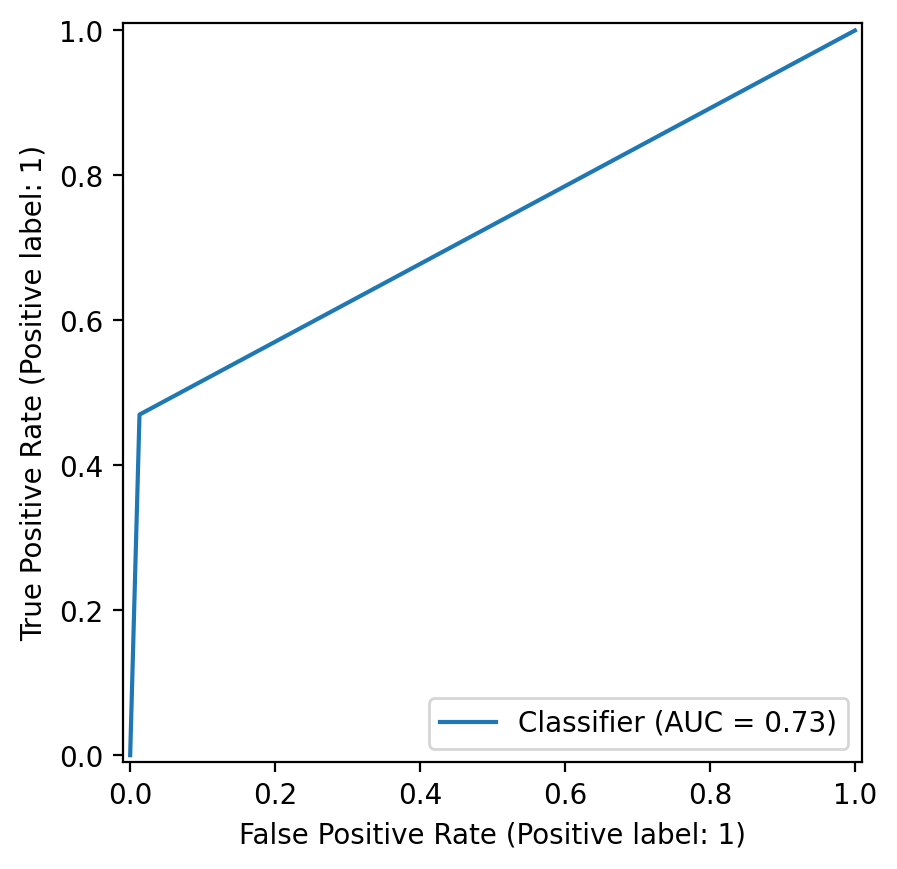

In [65]:
RocCurveDisplay.from_predictions( target_pipeline.transform(y_test), best_model.predict(X_test))
plt.show()

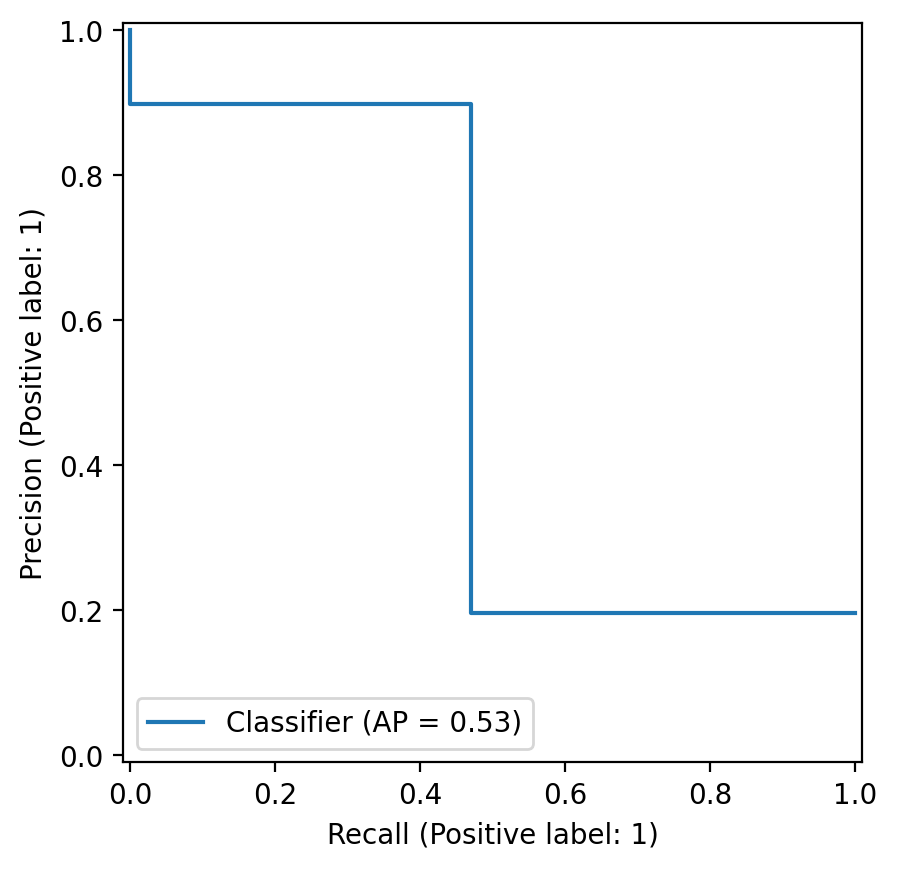

In [66]:
PrecisionRecallDisplay.from_predictions( target_pipeline.transform(y_test), best_model.predict(X_test))